In [3]:
import tabula
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker


In [4]:
#URL documento Censo 1790
url="https://www.inegi.org.mx/contenido/productos/prod_serv/contenidos/espanol/bvinegi/productos/censos/poblacion/1790/pcpne2010/LIBRO_REVILLAGIGEDO.pdf"

In [5]:
###Importar únicamente la página 35 del documento
arreglo=tabula.read_pdf(url,pages="35")
arreglo

[        Jurisdicciones    Hombres  Hombres.1    Mujeres
 0                  NaN  y mujeres        NaN        NaN
 1         NUEVA ESPAÑA  4 530 436  2 257 854  2 272 582
 2   Alta California(2)      8 540      4 472      4 068
 3   Baja California(2)      4 076      2 258      1 818
 4           Durango(3)    123 070     62 844     60 226
 5       Guadalajara(4)    505 428    235 075    270 353
 6        Guanajuato(5)    430 127    214 553    215 574
 7     Mérida(6) (1789)    364 022    180 579    183 443
 8            México(7)  1 147 973    574 786    573 187
 9         Nuevo México     30 953     16 039     14 914
 10              Oaxaca    411 336    206 981    204 355
 11           Puebla(8)    528 463    257 944    270 519
 12     San Luis Potosí    242 280    124 944    117 336
 13          Sinaloa(9)     55 062     27 772     27 290
 14           Sonora(9)     38 305     20 473     17 832
 15        Tlaxcala(10)     59 148     29 997     29 151
 16          Valladolid    287 

In [6]:
#Transformar arreglo en dataframe
df = pd.DataFrame(np.array(arreglo).reshape(19,4), columns=["juris","total","hombres","mujeres"])
#Eliminar primeras dos filas
df.drop(index=df.index[:2],inplace=True)
#Imprimir dataframe
df

,juris,total,hombres,mujeres
2,Alta California(2),8 540,4 472,4 068
3,Baja California(2),4 076,2 258,1 818
4,Durango(3),123 070,62 844,60 226
5,Guadalajara(4),505 428,235 075,270 353
6,Guanajuato(5),430 127,214 553,215 574
7,Mérida(6) (1789),364 022,180 579,183 443
8,México(7),1 147 973,574 786,573 187
9,Nuevo México,30 953,16 039,14 914
10,Oaxaca,411 336,206 981,204 355
11,Puebla(8),528 463,257 944,270 519


In [7]:
#Eliminar paréntesis de nombres
df["juris"] = df["juris"].str.replace(r"\([^()]*\)","")
#Eliminar espacios de columnas con números y cambiar el tipo de variable
df[['total', 'hombres', 'mujeres']] = df[['total', 'hombres', 'mujeres']].replace(" ", "",regex=True).apply(pd.to_numeric)
#Imprimir tipo de variables
df.dtypes

C:\Users\claud\AppData\Local\Temp/ipykernel_34916/1275409438.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["juris"] = df["juris"].str.replace(r"\([^()]*\)","")


juris      object
total       int64
hombres     int64
mujeres     int64
dtype: object

In [8]:
#Ordenar por mujeres e imprimir
df.sort_values(by="mujeres", ascending=False, inplace=True)
df

,juris,total,hombres,mujeres
8,México,1147973,574786,573187
11,Puebla,528463,257944,270519
5,Guadalajara,505428,235075,270353
6,Guanajuato,430127,214553,215574
10,Oaxaca,411336,206981,204355
7,Mérida,364022,180579,183443
16,Valladolid,287841,146902,140939
12,San Luis Potosí,242280,124944,117336
17,Veracruz,163539,85694,77845
18,Zacatecas,130273,66541,63732


In [9]:
#Pasar de wide a long y eliminar totales
df=pd.melt(df, id_vars=['juris'],value_name="personas",var_name="tipo")
df.query('tipo!= "total"', inplace = True)
df

,juris,tipo,personas
17,México,hombres,574786
18,Puebla,hombres,257944
19,Guadalajara,hombres,235075
20,Guanajuato,hombres,214553
21,Oaxaca,hombres,206981
22,Mérida,hombres,180579
23,Valladolid,hombres,146902
24,San Luis Potosí,hombres,124944
25,Veracruz,hombres,85694
26,Zacatecas,hombres,66541


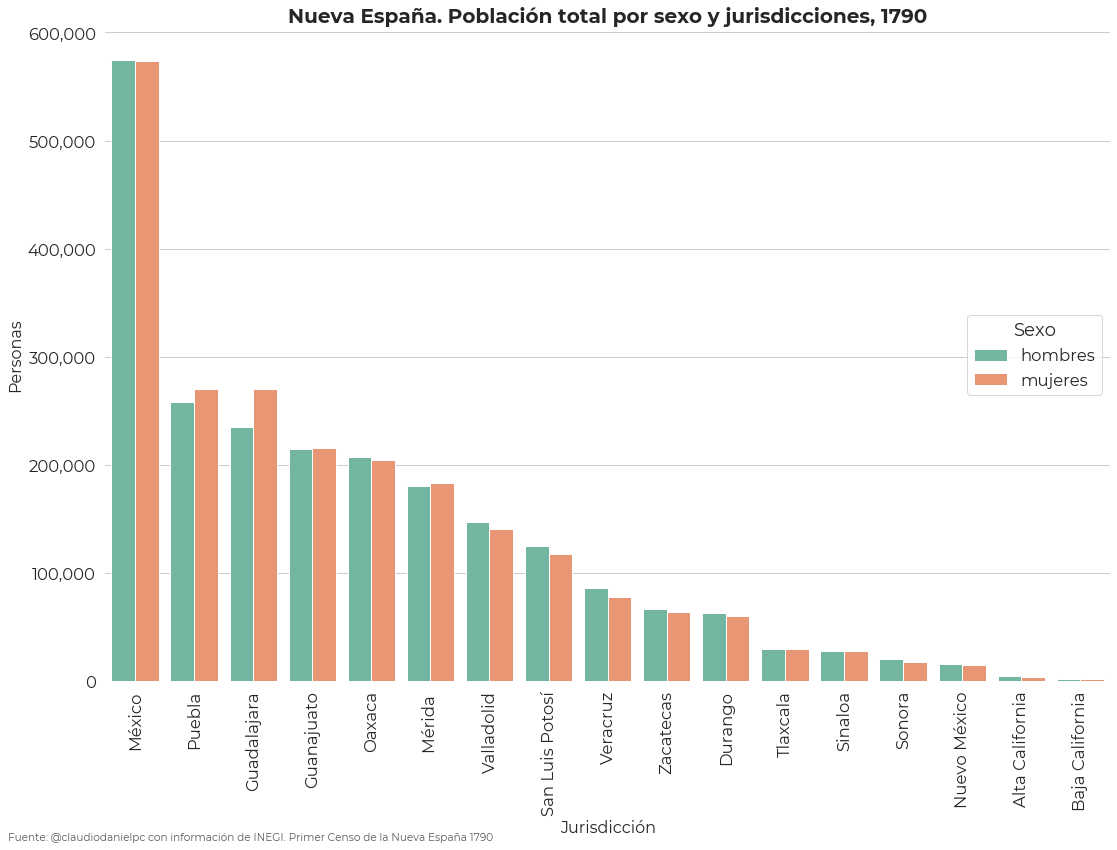

In [11]:
#Figura
#Parámetros de Seaborn y fuente
sns.set(font_scale = 1.5)
sns.set_palette('Set2')
sns.set_style("whitegrid")
rcParams['font.family'] = 'Montserrat'


#Definición de la figura
f, ax = plt.subplots(figsize = (18,12))
#Grafica de barras
sns.barplot(x = 'juris', y = 'personas', hue="tipo", data = df,ci=None)
#Formato de ejes
plt.ylabel("Personas", size=16)
plt.xlabel("Jurisdicción", size=16)
plt.title("Nueva España. Población total por sexo y jurisdicciones, 1790", size=20, fontweight="bold")
plt.xticks(rotation=90)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
#Gráfico sin marco
plt.box(on=None)
#Ubicación de la leyenda
plt.legend(loc='center right', title='Sexo')
#Ubicación de la fuente del gráfico
f.text(.05,-.06, s='Fuente: @claudiodanielpc con información de INEGI. Primer Censo de la Nueva España 1790', 
ha='left', fontsize=10.5, alpha=0.75)
#Salvar figura
f.savefig("D:/dataviz/censo1790.png",dpi=300,bbox_inches="tight")
#Mostrar figura en Notebook
plt.show()